# Predicting Injuries during NYPD Use of Force Incidents

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [2]:
os.getcwd()

'/Users/chloebergsma-safar/Desktop/Metis/NBM_Classification_Project/Metis-Classification'

In [3]:
os.chdir('/Users/chloebergsma-safar/Desktop/Metis/NBM_Classification_Project')

# Read in NYPD Use of Force datasets

## incidents

In [4]:
incidents = pd.read_csv('NYPD_Use_of_Force_Incidents.csv')

In [5]:
incidents.shape

(13527, 7)

In [6]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527 entries, 0 to 13526
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TRI Incident Number  13527 non-null  int64 
 1   ForceType            13527 non-null  object
 2   Occurrence Date      13527 non-null  object
 3   Incident Pct         13527 non-null  int64 
 4   Patrol Borough       13527 non-null  object
 5   YearMonthShort       13527 non-null  object
 6   BasisForEncounter    13527 non-null  object
dtypes: int64(2), object(5)
memory usage: 739.9+ KB


## members of service

In [7]:
members = pd.read_csv('NYPD_Use_of_Force__Members_of_Service.csv')

In [8]:
members.shape

(31257, 8)

In [9]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31257 entries, 0 to 31256
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TRI Incident Number  31257 non-null  int64 
 1   ForceType            31257 non-null  object
 2   InjuryLevel          31257 non-null  object
 3   Member Injured       31257 non-null  object
 4   Rank Grouped         31257 non-null  object
 5   Assignment           31257 non-null  object
 6   Member Gender        31257 non-null  object
 7   Race                 31257 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


## subjects

In [10]:
subjects = pd.read_csv('NYPD_Use_of_Force__Subjects.csv')

In [11]:
subjects.shape

(13283, 8)

In [12]:
subjects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13283 entries, 0 to 13282
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TRI Incident Number   13283 non-null  int64  
 1   Subject Injury Level  13283 non-null  object 
 2   Subject Injured       13283 non-null  object 
 3   Age                   12741 non-null  float64
 4   Subject Race          13283 non-null  object 
 5   Subject Gender        13283 non-null  object 
 6   Force Against MOS     13283 non-null  object 
 7   Subject Used Force    13283 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 830.3+ KB


## Briefly analyze individual datasets to see certain columns I perceive to be useful in the final dataset for modeling contain

## incidents

In [13]:
incidents.columns

Index(['TRI Incident Number', 'ForceType', 'Occurrence Date', 'Incident Pct',
       'Patrol Borough', 'YearMonthShort', 'BasisForEncounter'],
      dtype='object')

In [14]:
incidents['Occurrence Date'].value_counts()

06/01/2020    82
01/01/2020    69
06/02/2020    64
05/29/2020    63
05/31/2020    51
              ..
07/18/2020     4
03/28/2021     4
07/17/2020     4
07/16/2020     2
07/06/2020     1
Name: Occurrence Date, Length: 731, dtype: int64

In [15]:
incidents['ForceType'].value_counts()

Physical Force              10172
Electrical Weapon            2855
OC Spray                      259
Impact Weapon                 142
Firearm                        88
Restraining Mesh Blanket        8
Police Canine                   3
Name: ForceType, dtype: int64

In [16]:
incidents['BasisForEncounter'].value_counts()

CRIME/VIOLATION IN PROGRESS              5279
PERSON IN CRISIS                         3235
OTHER                                    1273
PRISONER                                 1092
CROWD CONTROL                             526
VTL INFRACTION                            441
WANTED SUSPECT (E.G. WARRANT, I CARD)     437
PAST CRIME/VIOLATION                      402
SUSPICIOUS ACTIVITY                       226
DETECTIVE INVESTIGATION                   140
TRANSIT EJECTION                          104
ORDER OF PROTECTION                        95
NON-CRIME CALLS FOR SERVICE                95
IN CUSTODY INJURY                          71
HOME VISIT                                 38
SEARCH WARRANT                             23
AMBUSH OF MEMBER                           23
ANIMAL CONDITION                           14
HOSTAGE/BARRICADED                         13
Name: BasisForEncounter, dtype: int64

In [17]:
incidents['Patrol Borough'].value_counts()

PBBX    3307
PBBN    2145
PBBS    1864
PBMS    1748
PBMN    1621
PBQS    1353
PBQN     953
PBSI     536
Name: Patrol Borough, dtype: int64

## members

In [18]:
members.columns

Index(['TRI Incident Number', 'ForceType', 'InjuryLevel', 'Member Injured',
       'Rank Grouped', 'Assignment', 'Member Gender', 'Race'],
      dtype='object')

In [19]:
members.shape

(31257, 8)

In [20]:
members.head()

,TRI Incident Number,ForceType,InjuryLevel,Member Injured,Rank Grouped,Assignment,Member Gender,Race
0,2020020962018,Physical Force,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE
1,2020020962018,Physical Force,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE
2,2020020962021,Physical Force,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE
3,2020020962022,Physical Force,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE
4,2020020962025,Physical Force,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE


In [21]:
# get the count of the # of incidents that involved 2+ NYPD members of service
incidents_2_plus_mos = members[members.duplicated(['TRI Incident Number'], keep=False)]
incidents_2_plus_mos['TRI Incident Number'].nunique()

8565

In [22]:
# get the count of the # of incidents that involved 2+ NYPD members of service and unique values in the force_against_mos column
len(incidents_2_plus_mos.groupby('TRI Incident Number')['Rank Grouped'].nunique())

8565

In [23]:
members['InjuryLevel'].value_counts()

No Injury                      25794
Physical Injury                 5062
Substantial Physical Injury      261
Serious Physical Injury          140
Name: InjuryLevel, dtype: int64

In [24]:
members['Rank Grouped'].value_counts()

Police Officer      26512
Sergeant             2353
Detective            1251
Lieutenant            718
Other                 290
Captain                71
Deputy Inspector       26
Inspector              15
Chief                  13
RECODE                  8
Name: Rank Grouped, dtype: int64

In [25]:
members['Assignment'].value_counts()

SECTOR/RESPONSE AUTO    19003
OTHER                    6168
FIXED POST               1919
ANTI-CRIME               1897
NCO                      1122
INVESTIGATION            1055
OFF DUTY                   71
SCOOTER                    22
Name: Assignment, dtype: int64

In [26]:
members['Member Gender'].value_counts()

MALE      27817
FEMALE     3440
Name: Member Gender, dtype: int64

In [27]:
members['Race'].value_counts()

WHITE          14767
HISPANIC       10001
BLACK           3775
ASIAN           2673
AMER INDIAN       25
OTH/UNK           16
Name: Race, dtype: int64

## subjects

In [28]:
subjects.columns

Index(['TRI Incident Number', 'Subject Injury Level', 'Subject Injured', 'Age',
       'Subject Race', 'Subject Gender', 'Force Against MOS',
       'Subject Used Force'],
      dtype='object')

In [29]:
subjects.shape

(13283, 8)

In [30]:
subjects['TRI Incident Number'].nunique()

12633

In [31]:
# get the count of the # of incidents that involved 2+ non-NYPD subjects
incidents_2_plus_subjects = subjects[subjects.duplicated(['TRI Incident Number'], keep=False)]
incidents_2_plus_subjects['TRI Incident Number'].nunique()

516

In [32]:
# get the count of the # of incidents that involved 2+ non-NYPD subjects and unique values in the force_against_mos column
len(incidents_2_plus_subjects.groupby('TRI Incident Number')['Force Against MOS'].nunique())

516

In [33]:
subjects.sort_values(by=['TRI Incident Number'], inplace=True)
subjects[subjects['TRI Incident Number'].duplicated(keep=False)].head(10)

,TRI Incident Number,Subject Injury Level,Subject Injured,Age,Subject Race,Subject Gender,Force Against MOS,Subject Used Force
4555,2020020962079,No Injury,N,21.0,HISPANIC,FEMALE,Physical Force,Y
7177,2020020962079,No Injury,N,24.0,WHITE,FEMALE,Physical Force,Y
10936,2020020962081,Physical Injury,Y,28.0,BLACK,MALE,Physical Force,Y
3085,2020020962081,No Injury,N,42.0,BLACK,MALE,Physical Force,Y
8673,2020020962083,Physical Injury,Y,29.0,HISPANIC,MALE,Physical Force,Y
8674,2020020962083,Physical Injury,Y,20.0,HISPANIC,MALE,Physical Force,Y
7606,2020020962083,No Injury,N,NaN,UNK/OTH,UNK,Physical Force,Y
4880,2020020962100,No Injury,N,18.0,HISPANIC,MALE,Physical Force,Y
6020,2020020962100,No Injury,N,21.0,HISPANIC,MALE,Physical Force,Y
2247,2020024962031,No Injury,N,17.0,BLACK,MALE,Physical Force,Y


The above three cells illustrate that even when more than one subject is involved in an incident, there's only one value per incident in the 'force against mos' column, so it's not possible to know whether one or more subjects executed the source

In [34]:
subjects['Subject Injury Level'].value_counts()

No Injury                      8988
Physical Injury                4009
Substantial Physical Injury     151
Serious Physical Injury         115
Death                            20
Name: Subject Injury Level, dtype: int64

In [35]:
subjects['Force Against MOS'].value_counts()

Physical Force        11552
No Force               1434
Displayed Weapon        158
Impact Weapon           100
Firearm                  22
Cutting Instrument       17
Name: Force Against MOS, dtype: int64

In [36]:
subjects['Subject Race'].value_counts()

BLACK          7386
HISPANIC       3841
WHITE          1167
UNK/OTH         531
ASIAN           329
AMER INDIAN      29
Name: Subject Race, dtype: int64

In [37]:
subjects.columns

Index(['TRI Incident Number', 'Subject Injury Level', 'Subject Injured', 'Age',
       'Subject Race', 'Subject Gender', 'Force Against MOS',
       'Subject Used Force'],
      dtype='object')

## Feature Types

In thinking about what features might be useful in my model, I divided them into the following three categories:

* **Incident** features: general information about ___all___ incidents involving NYPD use of force. Examples: the force type, incident date, incident precinct, the patrol borough, the basis for encounter, number of subjects involved in an incident, number of members of service involved in an incident, whether subject used force against a member of service, type of force used against member of service (if any)
* **non-NYPD subject** features: information about specific non-NYPD subjects involved in use of force incidents. Examples: age, race, gender
* **NYPD member of service** features: information about specific members of service involved in use of force incidents. Examples: whether member of service was injured, injury level, ranking group, assignment, gender, race

## Clean individual datasets

In [38]:
# clean up column names in datasets

incidents.columns = incidents.columns.str.lower().str.replace(' ','_')
members.columns = members.columns.str.lower().str.replace(' ','_')
subjects.columns = subjects.columns.str.lower().str.replace(' ','_')

## Constructing the observations

Each observation = a subject-member-of-service pair

In [39]:
subjects_df = subjects

In [40]:
subjects_df.shape

(13283, 8)

In [41]:
# add column to assign index to each subject (this will help with merging later)

subjects_df.reset_index(inplace=True)
subjects_df = subjects_df.rename(columns = {'index':'subject_id'})

In [42]:
subjects_df.head()

,subject_id,tri_incident_number,subject_injury_level,subject_injured,age,subject_race,subject_gender,force_against_mos,subject_used_force
0,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y
1,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y
2,12545,2020020962019,No Injury,N,13.0,BLACK,MALE,No Force,N
3,12546,2020020962021,No Injury,N,25.0,BLACK,MALE,No Force,N
4,7998,2020020962022,Physical Injury,Y,39.0,HISPANIC,FEMALE,Physical Force,Y


1. left join incidents on subjects df

In [43]:
incidents.columns

Index(['tri_incident_number', 'forcetype', 'occurrence_date', 'incident_pct',
       'patrol_borough', 'yearmonthshort', 'basisforencounter'],
      dtype='object')

In [44]:
subjects_incidents = subjects_df.merge(incidents, on='tri_incident_number', how='left')

In [45]:
subjects_incidents.head()

,subject_id,tri_incident_number,subject_injury_level,subject_injured,age,subject_race,subject_gender,force_against_mos,subject_used_force,forcetype,occurrence_date,incident_pct,patrol_borough,yearmonthshort,basisforencounter
0,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y,Physical Force,01/03/2020,1,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS
1,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y,Physical Force,01/07/2020,1,PBMS,2020 Jan,PRISONER
2,12545,2020020962019,No Injury,N,13.0,BLACK,MALE,No Force,N,Physical Force,01/07/2020,1,PBMS,2020 Jan,OTHER
3,12546,2020020962021,No Injury,N,25.0,BLACK,MALE,No Force,N,Physical Force,01/10/2020,1,PBMS,2020 Jan,PAST CRIME/VIOLATION
4,7998,2020020962022,Physical Injury,Y,39.0,HISPANIC,FEMALE,Physical Force,Y,Physical Force,01/11/2020,1,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS


2. add the number of non-NYPD subjects involved in an incident of force

In [46]:
subjects_count = (subjects_df.groupby('tri_incident_number',as_index=False)['subject_id']
                  .count().rename(columns={'subject_id': 'num_subjects'}))
subjects_incidents = subjects_incidents.merge(subjects_count,on='tri_incident_number')

In [47]:
subjects_incidents.shape

(13283, 16)

In [48]:
subjects_incidents.num_subjects.value_counts()

1     12117
2       844
3       216
4        60
5        15
6        12
11       11
8         8
Name: num_subjects, dtype: int64

Investigate relationship between subject-incident pairings and members' tables

In [49]:
subject_incident = subjects_incidents.tri_incident_number
subject_incident = set(subject_incident)

In [50]:
# create filtered members df that only contains incidents with subject data

members_rev = members[members['tri_incident_number'].isin(subject_incident)]

In [51]:
members_rev.shape

(30040, 8)

In [52]:
# create a df with number of unique forcetypes per incident in members table

members_forcetypes_per_incident = (members_rev.groupby('tri_incident_number')['forcetype'].nunique().reset_index())

In [53]:
members_forcetypes_per_incident.forcetype.value_counts()

1    11331
2     1223
3       34
4        1
Name: forcetype, dtype: int64

In [54]:
# create a df with number of unique forcetypes per incident in subjects_incidents

subjects_incidents_forcetypes_per_incident = (subjects_incidents.groupby('tri_incident_number')['forcetype'].nunique().reset_index())

In [55]:
subjects_incidents_forcetypes_per_incident.forcetype.value_counts()

1    12633
Name: forcetype, dtype: int64

The above cells indicate that there are almost 1300 incidents in which members involved used different types of force. This is interesting given that each incident in the incidents table assigns a single force type to an incident (i.e., even if more than one type of force was used in an incident, the incident was only assigned a single force type in the incidents table).

Below, I'll look at a couple incidents where the number of unique force types in the members table is greater than 1.

In [56]:
members_forcetypes_per_incident[members_forcetypes_per_incident.forcetype == 4]

,tri_incident_number,forcetype
10766,2021100962049,4


In [57]:
subjects_incidents[subjects_incidents.tri_incident_number == 2021100962049]

,subject_id,tri_incident_number,subject_injury_level,subject_injured,age,subject_race,subject_gender,force_against_mos,subject_used_force,forcetype,occurrence_date,incident_pct,patrol_borough,yearmonthshort,basisforencounter,num_subjects
11354,10922,2021100962049,Physical Injury,Y,25.0,BLACK,MALE,Physical Force,Y,Electrical Weapon,04/26/2021,81,PBBN,2021 Apr,PERSON IN CRISIS,1


In [58]:
members_rev[members_rev.tri_incident_number == 2021100962049]

,tri_incident_number,forcetype,injurylevel,member_injured,rank_grouped,assignment,member_gender,race
4415,2021100962049,Physical Force,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE
21069,2021100962049,Impact Weapon,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE
21070,2021100962049,Impact Weapon,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,HISPANIC
21071,2021100962049,Impact Weapon,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,HISPANIC
23314,2021100962049,Electrical Weapon,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE
26864,2021100962049,OC Spray,No Injury,N,Sergeant,OTHER,MALE,BLACK


The above two cells show that while the force type for incident 2021100962049 in the incidents table is categorized as 'electrical weapon', the members involved in the incident apparently used other types of force, including physical force, an impact weapon, and OC spray.

In [59]:
members_forcetypes_per_incident[members_forcetypes_per_incident.forcetype == 3].sample(1)

,tri_incident_number,forcetype
11646,2021124962075,3


In [60]:
subjects_incidents[subjects_incidents.tri_incident_number == 2021052962022]

,subject_id,tri_incident_number,subject_injury_level,subject_injured,age,subject_race,subject_gender,force_against_mos,subject_used_force,forcetype,occurrence_date,incident_pct,patrol_borough,yearmonthshort,basisforencounter,num_subjects
8028,9265,2021052962022,Physical Injury,Y,24.0,HISPANIC,MALE,Physical Force,Y,Electrical Weapon,01/30/2021,33,PBMN,2021 Jan,VTL INFRACTION,1


In [61]:
members_rev[members_rev.tri_incident_number == 2021052962022]

,tri_incident_number,forcetype,injurylevel,member_injured,rank_grouped,assignment,member_gender,race
13956,2021052962022,Physical Force,No Injury,N,Police Officer,OTHER,MALE,HISPANIC
16535,2021052962022,Physical Force,No Injury,N,Police Officer,OTHER,MALE,WHITE
21053,2021052962022,Impact Weapon,No Injury,N,Police Officer,OTHER,MALE,HISPANIC
23754,2021052962022,Electrical Weapon,No Injury,N,Police Officer,OTHER,FEMALE,HISPANIC
30522,2021052962022,Physical Force,No Injury,N,Sergeant,OTHER,MALE,HISPANIC


The above two cells show that while the force type for incident 2020079962025 in the incidents table is categorized as 'electrical weapon', the members involved in the incident apparently used other types of force, including physical force and an impact weapon.

3. add the number of NYPD members of service involved in a specific incident

In [62]:
# add column to assign index to each member of service

members_rev.reset_index(inplace=True)
members_rev = members_rev.rename(columns = {'index':'mos_id'})

In [63]:
members_tri_member_count = (members_rev.groupby('tri_incident_number',as_index=False)['mos_id'].count())

member_count_feature = ['num_members']

members_tri_member_count.columns = ['tri_incident_number'] + member_count_feature

subjects_incidents = subjects_incidents.merge(members_tri_member_count, on='tri_incident_number', how='left')

In [64]:
subjects_incidents.head()

,subject_id,tri_incident_number,subject_injury_level,subject_injured,age,subject_race,subject_gender,force_against_mos,subject_used_force,forcetype,occurrence_date,incident_pct,patrol_borough,yearmonthshort,basisforencounter,num_subjects,num_members
0,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y,Physical Force,01/03/2020,1,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS,1,2.0
1,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y,Physical Force,01/07/2020,1,PBMS,2020 Jan,PRISONER,1,2.0
2,12545,2020020962019,No Injury,N,13.0,BLACK,MALE,No Force,N,Physical Force,01/07/2020,1,PBMS,2020 Jan,OTHER,1,1.0
3,12546,2020020962021,No Injury,N,25.0,BLACK,MALE,No Force,N,Physical Force,01/10/2020,1,PBMS,2020 Jan,PAST CRIME/VIOLATION,1,1.0
4,7998,2020020962022,Physical Injury,Y,39.0,HISPANIC,FEMALE,Physical Force,Y,Physical Force,01/11/2020,1,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS,1,2.0


4. add that all NYPD members of service involved in an incident have different race from the non-NYPD subject (binary)

In [65]:
subjects['subject_race'].value_counts()

BLACK          7386
HISPANIC       3841
WHITE          1167
UNK/OTH         531
ASIAN           329
AMER INDIAN      29
Name: subject_race, dtype: int64

In [66]:
members_rev['race'].value_counts()

WHITE          14355
HISPANIC        9547
BLACK           3549
ASIAN           2549
AMER INDIAN       24
OTH/UNK           16
Name: race, dtype: int64

In [67]:
# change 'OTH/UNK' category in members' race column so it matches the category in subjects' race column

members_rev.loc[members_rev.race == 'OTH/UNK', 'race'] = 'UNK/OTH'

In [68]:
members_tri_race = (members_rev.groupby('tri_incident_number', as_index=False)
               .agg({'race': (lambda x: set(x))})
               .rename(columns={'race': 'mos_race_set'}))

subjects_incidents = subjects_incidents.merge(members_tri_race, on='tri_incident_number')
subjects_incidents['subject_mos_race_diff_all'] = (subjects_incidents.apply(lambda row: row['subject_race'] not in row['mos_race_set'], axis=1).astype(int))

In [69]:
subjects_incidents.head()

,subject_id,tri_incident_number,subject_injury_level,subject_injured,age,subject_race,subject_gender,force_against_mos,subject_used_force,forcetype,occurrence_date,incident_pct,patrol_borough,yearmonthshort,basisforencounter,num_subjects,num_members,mos_race_set,subject_mos_race_diff_all
0,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y,Physical Force,01/03/2020,1,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS,1,2.0,{HISPANIC},1
1,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y,Physical Force,01/07/2020,1,PBMS,2020 Jan,PRISONER,1,2.0,{WHITE},1
2,12545,2020020962019,No Injury,N,13.0,BLACK,MALE,No Force,N,Physical Force,01/07/2020,1,PBMS,2020 Jan,OTHER,1,1.0,{BLACK},0
3,12546,2020020962021,No Injury,N,25.0,BLACK,MALE,No Force,N,Physical Force,01/10/2020,1,PBMS,2020 Jan,PAST CRIME/VIOLATION,1,1.0,{WHITE},1
4,7998,2020020962022,Physical Injury,Y,39.0,HISPANIC,FEMALE,Physical Force,Y,Physical Force,01/11/2020,1,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS,1,2.0,"{HISPANIC, WHITE}",0


In [70]:
subjects_incidents.shape

(13230, 19)

5. add that all NYPD members of service were injured or not (binary)

In [71]:
members_rev.columns

Index(['mos_id', 'tri_incident_number', 'forcetype', 'injurylevel',
       'member_injured', 'rank_grouped', 'assignment', 'member_gender',
       'race'],
      dtype='object')

In [72]:
members_tri_injury = (members_rev.groupby('tri_incident_number', as_index=False)
               .agg({'member_injured': (lambda x: set(x))})
               .rename(columns={'member_injured': 'mos_injured_set'}))

subjects_incidents = subjects_incidents.merge(members_tri_injury, on='tri_incident_number')
subjects_incidents['mos_injured_unique'] = (subjects_incidents.apply(lambda row: len(row['mos_injured_set']), axis=1).astype(int))

In [73]:
subjects_incidents.head()

,subject_id,tri_incident_number,subject_injury_level,subject_injured,age,subject_race,subject_gender,force_against_mos,subject_used_force,forcetype,...,incident_pct,patrol_borough,yearmonthshort,basisforencounter,num_subjects,num_members,mos_race_set,subject_mos_race_diff_all,mos_injured_set,mos_injured_unique
0,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y,Physical Force,...,1,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS,1,2.0,{HISPANIC},1,{N},1
1,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y,Physical Force,...,1,PBMS,2020 Jan,PRISONER,1,2.0,{WHITE},1,{N},1
2,12545,2020020962019,No Injury,N,13.0,BLACK,MALE,No Force,N,Physical Force,...,1,PBMS,2020 Jan,OTHER,1,1.0,{BLACK},0,{N},1
3,12546,2020020962021,No Injury,N,25.0,BLACK,MALE,No Force,N,Physical Force,...,1,PBMS,2020 Jan,PAST CRIME/VIOLATION,1,1.0,{WHITE},1,{N},1
4,7998,2020020962022,Physical Injury,Y,39.0,HISPANIC,FEMALE,Physical Force,Y,Physical Force,...,1,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS,1,2.0,"{HISPANIC, WHITE}",0,"{N, Y}",2


In [74]:
subjects_incidents['mos_injured_all'] = subjects_incidents.apply(lambda row: row['mos_injured_unique'] == 1, axis=1).astype(int)

In [75]:
subjects_incidents.head()

,subject_id,tri_incident_number,subject_injury_level,subject_injured,age,subject_race,subject_gender,force_against_mos,subject_used_force,forcetype,...,patrol_borough,yearmonthshort,basisforencounter,num_subjects,num_members,mos_race_set,subject_mos_race_diff_all,mos_injured_set,mos_injured_unique,mos_injured_all
0,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y,Physical Force,...,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS,1,2.0,{HISPANIC},1,{N},1,1
1,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y,Physical Force,...,PBMS,2020 Jan,PRISONER,1,2.0,{WHITE},1,{N},1,1
2,12545,2020020962019,No Injury,N,13.0,BLACK,MALE,No Force,N,Physical Force,...,PBMS,2020 Jan,OTHER,1,1.0,{BLACK},0,{N},1,1
3,12546,2020020962021,No Injury,N,25.0,BLACK,MALE,No Force,N,Physical Force,...,PBMS,2020 Jan,PAST CRIME/VIOLATION,1,1.0,{WHITE},1,{N},1,1
4,7998,2020020962022,Physical Injury,Y,39.0,HISPANIC,FEMALE,Physical Force,Y,Physical Force,...,PBMS,2020 Jan,CRIME/VIOLATION IN PROGRESS,1,2.0,"{HISPANIC, WHITE}",0,"{N, Y}",2,0


6. left join members table on subjects_incidents

In [76]:
subjects_incidents = subjects_incidents.merge(members_rev, how='left', on='tri_incident_number')

In [77]:
subjects_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32272 entries, 0 to 32271
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 32272 non-null  int64  
 1   tri_incident_number        32272 non-null  int64  
 2   subject_injury_level       32272 non-null  object 
 3   subject_injured            32272 non-null  object 
 4   age                        31126 non-null  float64
 5   subject_race               32272 non-null  object 
 6   subject_gender             32272 non-null  object 
 7   force_against_mos          32272 non-null  object 
 8   subject_used_force         32272 non-null  object 
 9   forcetype_x                32272 non-null  object 
 10  occurrence_date            32272 non-null  object 
 11  incident_pct               32272 non-null  int64  
 12  patrol_borough             32272 non-null  object 
 13  yearmonthshort             32272 non-null  obj

In [78]:
# rename and drop unnecessary columns

subjects_incidents.drop(['forcetype_x'],axis=1,inplace=True)
subjects_incidents = subjects_incidents.rename(columns = {'forcetype_y':'forcetype',
                                                         'injurylevel':'member_injurylevel',
                                                         'race':'member_race',
                                                         'age':'subject_age'})

7. add whether the races of each non-NYPD subject-NYPD member of service pair are different (binary)

In [79]:
subjects_incidents['race_diff'] = np.where(subjects_incidents['subject_race'] == subjects_incidents['member_race'], 0, 1)

In [80]:
subjects_incidents.head()

,subject_id,tri_incident_number,subject_injury_level,subject_injured,subject_age,subject_race,subject_gender,force_against_mos,subject_used_force,occurrence_date,...,mos_injured_all,mos_id,forcetype,member_injurylevel,member_injured,rank_grouped,assignment,member_gender,member_race,race_diff
0,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y,01/03/2020,...,1,5721,Physical Force,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,HISPANIC,1
1,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y,01/03/2020,...,1,28410,Physical Force,No Injury,N,Lieutenant,SECTOR/RESPONSE AUTO,MALE,HISPANIC,1
2,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y,01/07/2020,...,1,0,Physical Force,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE,1
3,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y,01/07/2020,...,1,1,Physical Force,No Injury,N,Police Officer,SECTOR/RESPONSE AUTO,MALE,WHITE,1
4,12545,2020020962019,No Injury,N,13.0,BLACK,MALE,No Force,N,01/07/2020,...,1,28205,Physical Force,No Injury,N,Other,OFF DUTY,FEMALE,BLACK,0


In [81]:
subjects_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32272 entries, 0 to 32271
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 32272 non-null  int64  
 1   tri_incident_number        32272 non-null  int64  
 2   subject_injury_level       32272 non-null  object 
 3   subject_injured            32272 non-null  object 
 4   subject_age                31126 non-null  float64
 5   subject_race               32272 non-null  object 
 6   subject_gender             32272 non-null  object 
 7   force_against_mos          32272 non-null  object 
 8   subject_used_force         32272 non-null  object 
 9   occurrence_date            32272 non-null  object 
 10  incident_pct               32272 non-null  int64  
 11  patrol_borough             32272 non-null  object 
 12  yearmonthshort             32272 non-null  object 
 13  basisforencounter          32272 non-null  obj

Create dummy variables from categorical features

1. force type (reference category = Physical Force)

In [82]:
force_type = pd.get_dummies(subjects_incidents.forcetype, prefix='forcetype').drop('forcetype_Physical Force',axis=1)
subjects_incidents = pd.concat([subjects_incidents,force_type],axis=1)

2. basis for encounter (reference category = SUSPICIOUS ACTIVITY)

In [83]:
basis_encounter = pd.get_dummies(subjects_incidents.basisforencounter, prefix='basis_encounter').drop('basis_encounter_SUSPICIOUS ACTIVITY',axis=1)
subjects_incidents = pd.concat([subjects_incidents,basis_encounter],axis=1)

3. patrol borough (reference category = PBSI)

In [84]:
patrol_borough = pd.get_dummies(subjects_incidents.patrol_borough, prefix='patrol_borough').drop('patrol_borough_PBSI',axis=1)
subjects_incidents = pd.concat([subjects_incidents,patrol_borough],axis=1)

4. non-NYPD subject's gender (reference category = UNK)

In [85]:
subject_gender = pd.get_dummies(subjects_incidents.subject_gender, prefix='subject_gender').drop('subject_gender_UNK',axis=1)
subjects_incidents = pd.concat([subjects_incidents,subject_gender],axis=1)

5. non-NYPD subject's race (reference category = WHITE)

In [86]:
subject_race = pd.get_dummies(subjects_incidents.subject_race, prefix='subject_race').drop('subject_race_WHITE',axis=1)
subjects_incidents = pd.concat([subjects_incidents,subject_race],axis=1)

6. the force type used against an NYPD member of service, if any (reference category = No Force)

In [87]:
force_against_mos = pd.get_dummies(subjects_incidents.force_against_mos, prefix='force_against_mos').drop('force_against_mos_No Force',axis=1)
subjects_incidents = pd.concat([subjects_incidents,force_against_mos],axis=1)

7. an NYPD member of service was injured (reference category = N)

In [88]:
mos_injured = pd.get_dummies(subjects_incidents.member_injured, prefix='member_injured').drop('member_injured_N',axis=1)
subjects_incidents = pd.concat([subjects_incidents,mos_injured],axis=1)

8. a non-NYPD subject used force (reference category = N)

In [89]:
subject_used_force = pd.get_dummies(subjects_incidents.subject_used_force, prefix='subject_used_force').drop('subject_used_force_N',axis=1)
subjects_incidents = pd.concat([subjects_incidents,subject_used_force],axis=1)

9. an NYPD member of service's race (reference category = 'WHITE')

In [90]:
member_race = pd.get_dummies(subjects_incidents.member_race, prefix='member_race').drop('member_race_WHITE',axis=1)
subjects_incidents = pd.concat([subjects_incidents,member_race],axis=1)

10. an NYPD member of service's gender (reference category = 'MALE')

In [91]:
member_gender = pd.get_dummies(subjects_incidents.member_gender, prefix='member_gender').drop('member_gender_MALE',axis=1)
subjects_incidents = pd.concat([subjects_incidents,member_gender],axis=1)

11. an NYPD member of service's rank/title (reference category = 'Police Officer')

In [92]:
member_rank = pd.get_dummies(subjects_incidents.rank_grouped, prefix='member_rank').drop('member_rank_Police Officer',axis=1)
subjects_incidents = pd.concat([subjects_incidents,member_rank],axis=1)

12. an NYPD member of service's assignment (reference category = 'SECTOR/RESPONSE AUTO')

In [93]:
member_assignment = pd.get_dummies(subjects_incidents.assignment, prefix='member_assignment').drop('member_assignment_SECTOR/RESPONSE AUTO',axis=1)
subjects_incidents = pd.concat([subjects_incidents,member_assignment],axis=1)

13. all NYPD members of service injured (reference = 'N')

In [94]:
subjects_incidents['mos_injured_all'] = subjects_incidents.mos_injured_all.replace(0,'N')
subjects_incidents['mos_injured_all'] = subjects_incidents.mos_injured_all.replace(1,'Y')

In [95]:
member_injured_all = pd.get_dummies(subjects_incidents.mos_injured_all, prefix='member_injured_all').drop('member_injured_all_N',axis=1)
subjects_incidents = pd.concat([subjects_incidents,member_injured_all],axis=1)

14. all NYPD members of service had different race(s) from non-NYPD subject (reference = 'N')

In [96]:
subjects_incidents['subject_mos_race_diff_all'] = subjects_incidents.subject_mos_race_diff_all.replace(0,'N')
subjects_incidents['subject_mos_race_diff_all'] = subjects_incidents.subject_mos_race_diff_all.replace(1,'Y')

In [97]:
race_diff_all = pd.get_dummies(subjects_incidents.subject_mos_race_diff_all, prefix='race_diff_all').drop('race_diff_all_N',axis=1)
subjects_incidents = pd.concat([subjects_incidents,race_diff_all],axis=1)

15. race different between each non-NYPD subject and NYPD member of service pair (reference = 'N')

In [98]:
subjects_incidents['race_diff'] = subjects_incidents.race_diff.replace(0,'N')
subjects_incidents['race_diff'] = subjects_incidents.race_diff.replace(1,'Y')

In [99]:
race_diff = pd.get_dummies(subjects_incidents.race_diff, prefix='race_diff').drop('race_diff_N',axis=1)
subjects_incidents = pd.concat([subjects_incidents,race_diff],axis=1)

In [100]:
subjects_incidents.columns

Index(['subject_id', 'tri_incident_number', 'subject_injury_level',
       'subject_injured', 'subject_age', 'subject_race', 'subject_gender',
       'force_against_mos', 'subject_used_force', 'occurrence_date',
       'incident_pct', 'patrol_borough', 'yearmonthshort', 'basisforencounter',
       'num_subjects', 'num_members', 'mos_race_set',
       'subject_mos_race_diff_all', 'mos_injured_set', 'mos_injured_unique',
       'mos_injured_all', 'mos_id', 'forcetype', 'member_injurylevel',
       'member_injured', 'rank_grouped', 'assignment', 'member_gender',
       'member_race', 'race_diff', 'forcetype_Electrical Weapon',
       'forcetype_Firearm', 'forcetype_Impact Weapon', 'forcetype_OC Spray',
       'forcetype_Police Canine', 'forcetype_Restraining Mesh Blanket',
       'basis_encounter_AMBUSH OF MEMBER', 'basis_encounter_ANIMAL CONDITION',
       'basis_encounter_CRIME/VIOLATION IN PROGRESS',
       'basis_encounter_CROWD CONTROL',
       'basis_encounter_DETECTIVE INVESTIGATIO

## Constructing the observations' target values

In [101]:
subjects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13283 entries, 0 to 13282
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            13283 non-null  int64  
 1   tri_incident_number   13283 non-null  int64  
 2   subject_injury_level  13283 non-null  object 
 3   subject_injured       13283 non-null  object 
 4   age                   12741 non-null  float64
 5   subject_race          13283 non-null  object 
 6   subject_gender        13283 non-null  object 
 7   force_against_mos     13283 non-null  object 
 8   subject_used_force    13283 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 934.1+ KB


In [102]:
subjects_df['subject_injury_level'].value_counts()

No Injury                      8988
Physical Injury                4009
Substantial Physical Injury     151
Serious Physical Injury         115
Death                            20
Name: subject_injury_level, dtype: int64

In [103]:
# convert 'subject_injured' to 1s and 0s

injuries = {'Substantial Physical Injury','Serious Physical Injury','Death'}
subjects_df['subject_injured_target'] = subjects_df['subject_injury_level'].apply(lambda x: 1 if x in injuries else 0)

In [104]:
subjects_df['subject_injured_target'].value_counts()

0    12997
1      286
Name: subject_injured_target, dtype: int64

In [105]:
subjects_tri_injured = subjects_df[['subject_id','tri_incident_number','subject_injured_target']]

In [106]:
subjects_tri_injured.shape

(13283, 3)

In [107]:
# create target variable

subjects_incidents = subjects_incidents.merge(subjects_tri_injured, how='left',on='subject_id')

In [108]:
subjects_incidents.drop(['tri_incident_number_y'],axis=1,inplace=True)

In [109]:
subjects_incidents.rename(columns={"tri_incident_number_x": "tri_incident_number"}, inplace=True)

In [110]:
subjects_incidents.shape

(32272, 101)

In [111]:
subjects_incidents.head()

,subject_id,tri_incident_number,subject_injury_level,subject_injured,subject_age,subject_race,subject_gender,force_against_mos,subject_used_force,occurrence_date,...,member_assignment_FIXED POST,member_assignment_INVESTIGATION,member_assignment_NCO,member_assignment_OFF DUTY,member_assignment_OTHER,member_assignment_SCOOTER,member_injured_all_Y,race_diff_all_Y,race_diff_Y,subject_injured_target
0,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y,01/03/2020,...,0,0,0,0,0,0,1,1,1,0
1,9672,2020020962017,Physical Injury,Y,46.0,BLACK,MALE,Physical Force,Y,01/03/2020,...,0,0,0,0,0,0,1,1,1,0
2,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y,01/07/2020,...,0,0,0,0,0,0,1,1,1,0
3,8670,2020020962018,Physical Injury,Y,31.0,HISPANIC,MALE,Physical Force,Y,01/07/2020,...,0,0,0,0,0,0,1,1,1,0
4,12545,2020020962019,No Injury,N,13.0,BLACK,MALE,No Force,N,01/07/2020,...,0,0,0,1,0,0,1,0,0,0


In [112]:
subjects_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32272 entries, 0 to 32271
Columns: 101 entries, subject_id to subject_injured_target
dtypes: float64(2), int64(7), object(22), uint8(70)
memory usage: 10.0+ MB


In [113]:
# save subjects_incidents as csv
subjects_incidents.to_csv('nypd_force_df_rev2.csv', index=False)

## EDA

To begin exploring my dataset, I'll check to see how imbalanced the target variable is.

0    0.978836
1    0.021164
Name: subject_injured_target, dtype: float64


<AxesSubplot:>

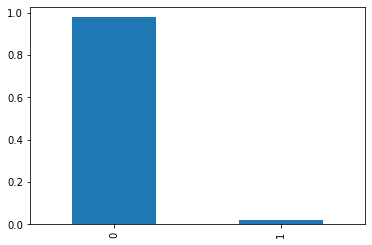

In [115]:
# check how imbalanced the target variable is

target_pcts = subjects_incidents.subject_injured_target.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar') # about 98% to 2% split

Next, I'll look at pair plots to visualize the relationship between my features and the target variable to see if any features look like they'll have strong predictive power of the target variable.

In [116]:
# create a helper function for plotting feature(s) vs target variable 

def plot_features(df,sample_size=500):
    
    sample = (df.sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='subject_injured_target', plot_kws=dict(alpha=.3, edgecolor='none'))

In order to visualize the pair plots well, I broke my features up.

Target variable versus numeric features

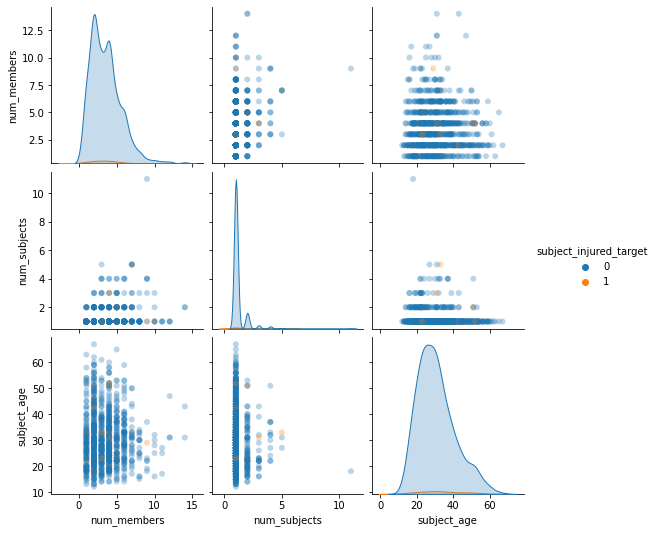

In [117]:
plot_features(subjects_incidents[['subject_injured_target','num_members','num_subjects','subject_age']])

Target variable versus type of force used by NYPD member of service

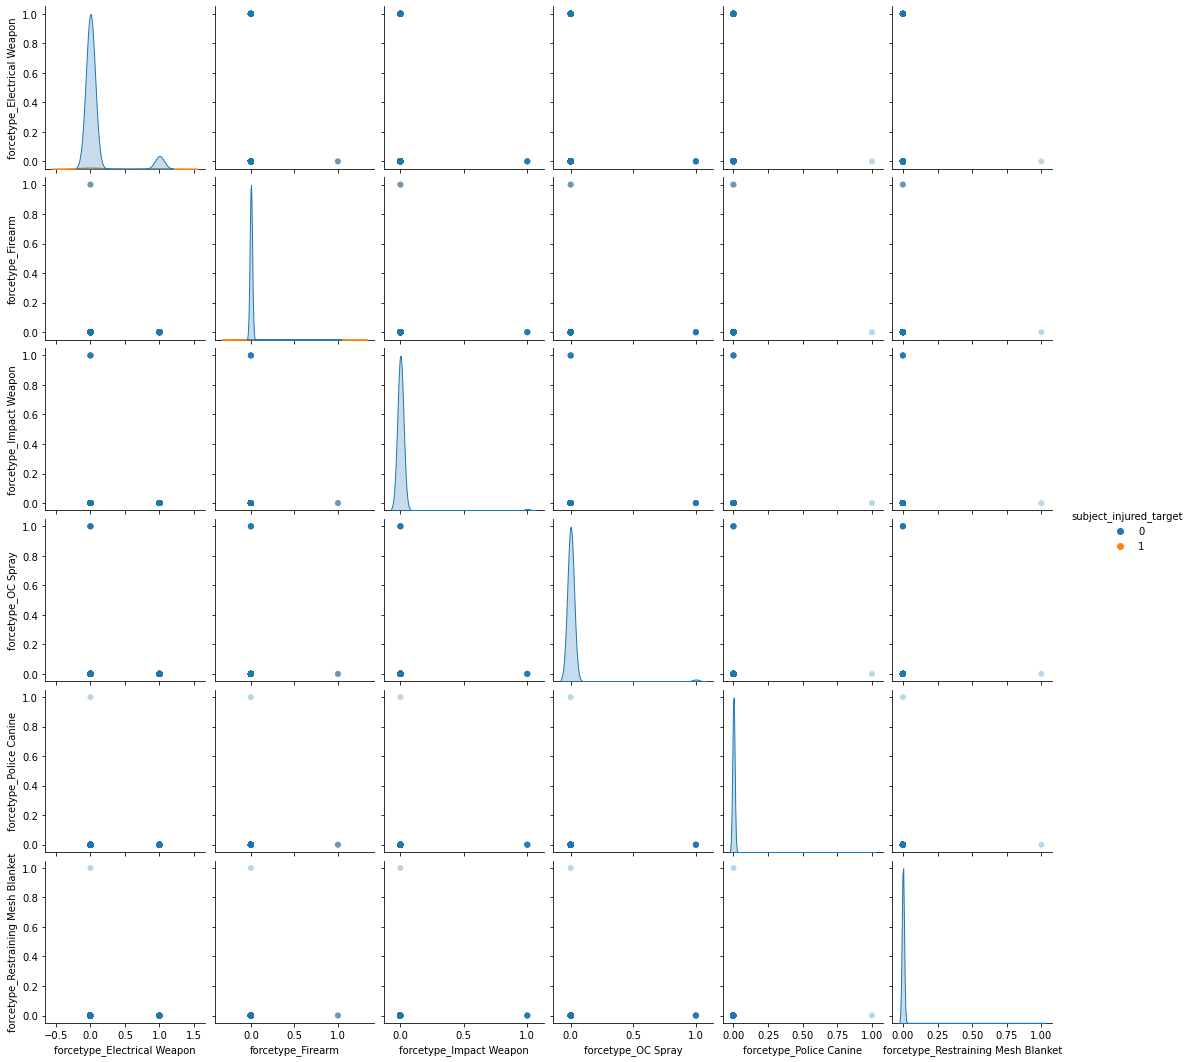

In [121]:
plot_features(subjects_incidents[['subject_injured_target','forcetype_Electrical Weapon',
       'forcetype_Firearm', 'forcetype_Impact Weapon', 'forcetype_OC Spray',
       'forcetype_Police Canine', 'forcetype_Restraining Mesh Blanket']])

Target variable versus non-NYPD subject's gender

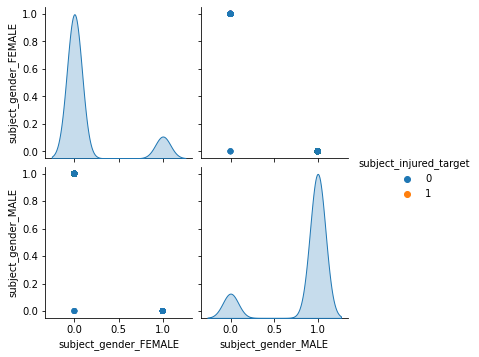

In [128]:
plot_features(subjects_incidents[['subject_injured_target','subject_gender_FEMALE', 'subject_gender_MALE']])

Target variable versus non-NYPD subject's race

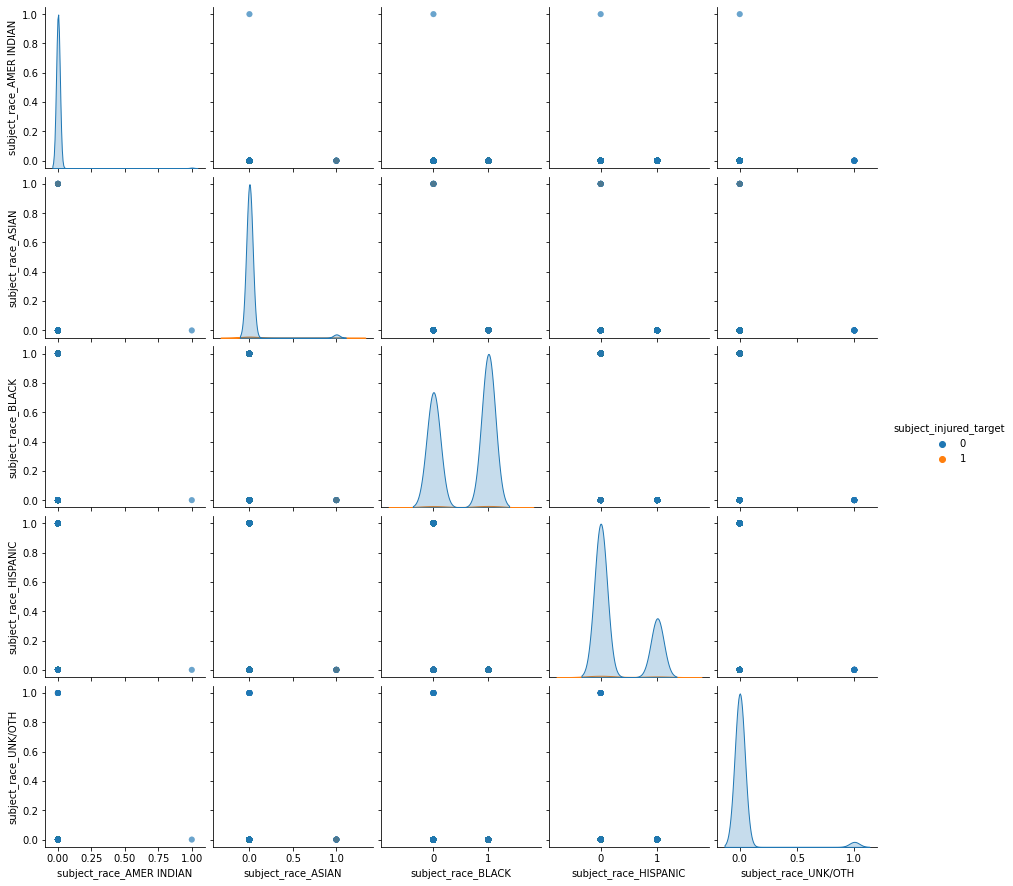

In [129]:
plot_features(subjects_incidents[['subject_injured_target','subject_race_AMER INDIAN', 'subject_race_ASIAN',
       'subject_race_BLACK', 'subject_race_HISPANIC', 'subject_race_UNK/OTH']])

Target variable versus the race of the non-NYPD subject being different from the race(s) of all members of service involved in the incident

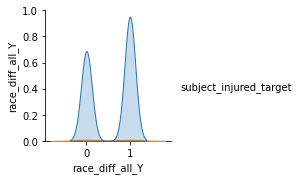

In [120]:
plot_features(subjects_incidents[['subject_injured_target','race_diff_all_Y']])

Target variable versus if all members of service involved in incidenet were injured

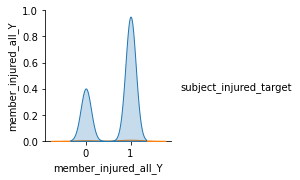

In [122]:
plot_features(subjects_incidents[['subject_injured_target','member_injured_all_Y']])

Target variable versus the non-NYPD subject used force

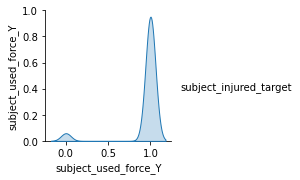

In [132]:
plot_features(subjects_incidents[['subject_injured_target','subject_used_force_Y']])

Target variable versus the type of force used by the non-NYPD subject (if any)

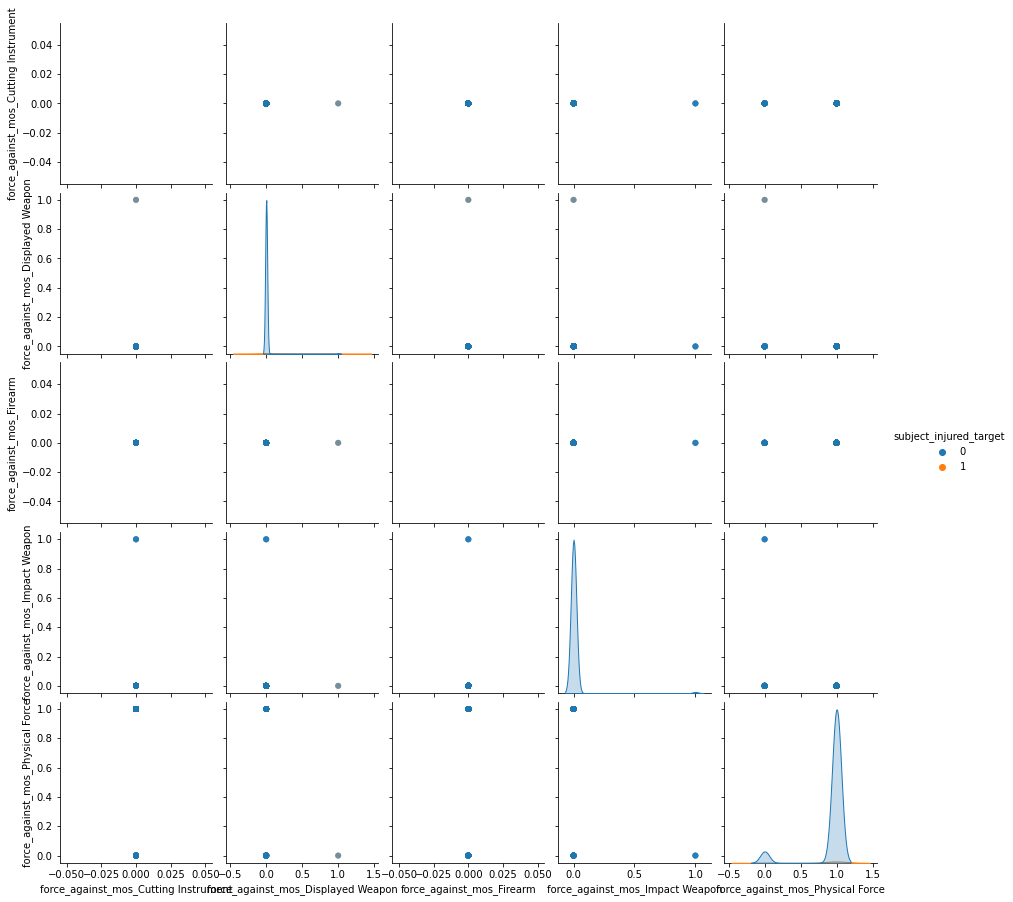

In [118]:
plot_features(subjects_incidents[['subject_injured_target','force_against_mos_Cutting Instrument',
       'force_against_mos_Displayed Weapon', 'force_against_mos_Firearm',
       'force_against_mos_Impact Weapon', 'force_against_mos_Physical Force']])

Target variable versus the first 9 of the 19 bases for encounter

In [126]:
subjects_incidents['basisforencounter'].nunique()

19

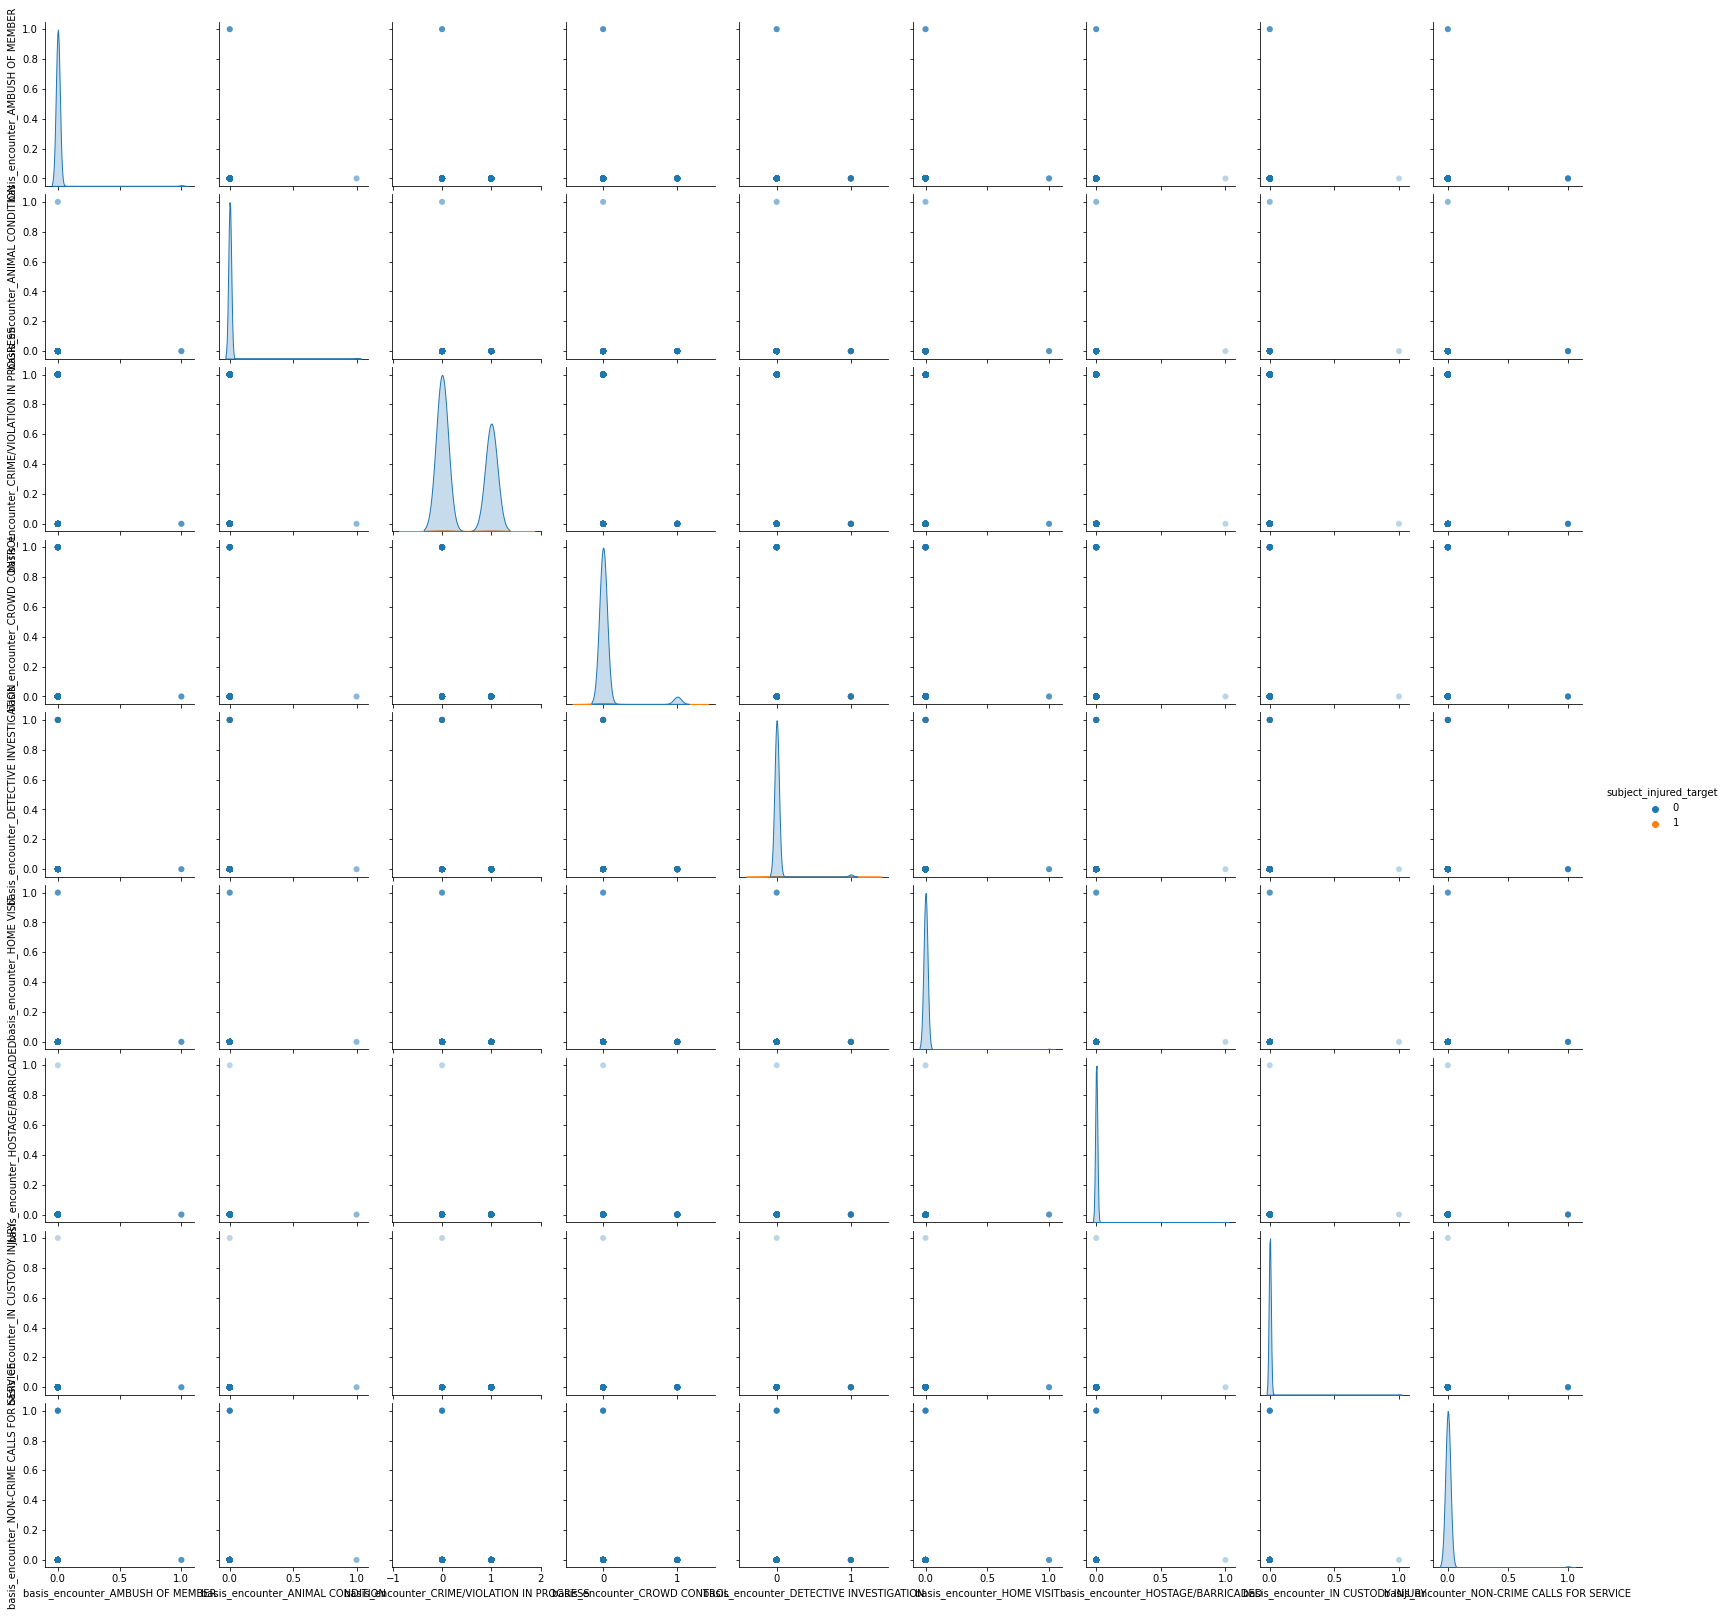

In [127]:
plot_features(subjects_incidents[['subject_injured_target','basis_encounter_AMBUSH OF MEMBER', 'basis_encounter_ANIMAL CONDITION',
       'basis_encounter_CRIME/VIOLATION IN PROGRESS','basis_encounter_CROWD CONTROL',
       'basis_encounter_DETECTIVE INVESTIGATION', 'basis_encounter_HOME VISIT',
       'basis_encounter_HOSTAGE/BARRICADED','basis_encounter_IN CUSTODY INJURY',
       'basis_encounter_NON-CRIME CALLS FOR SERVICE']])

Target variable versus the last 10 of 19 bases for encounter

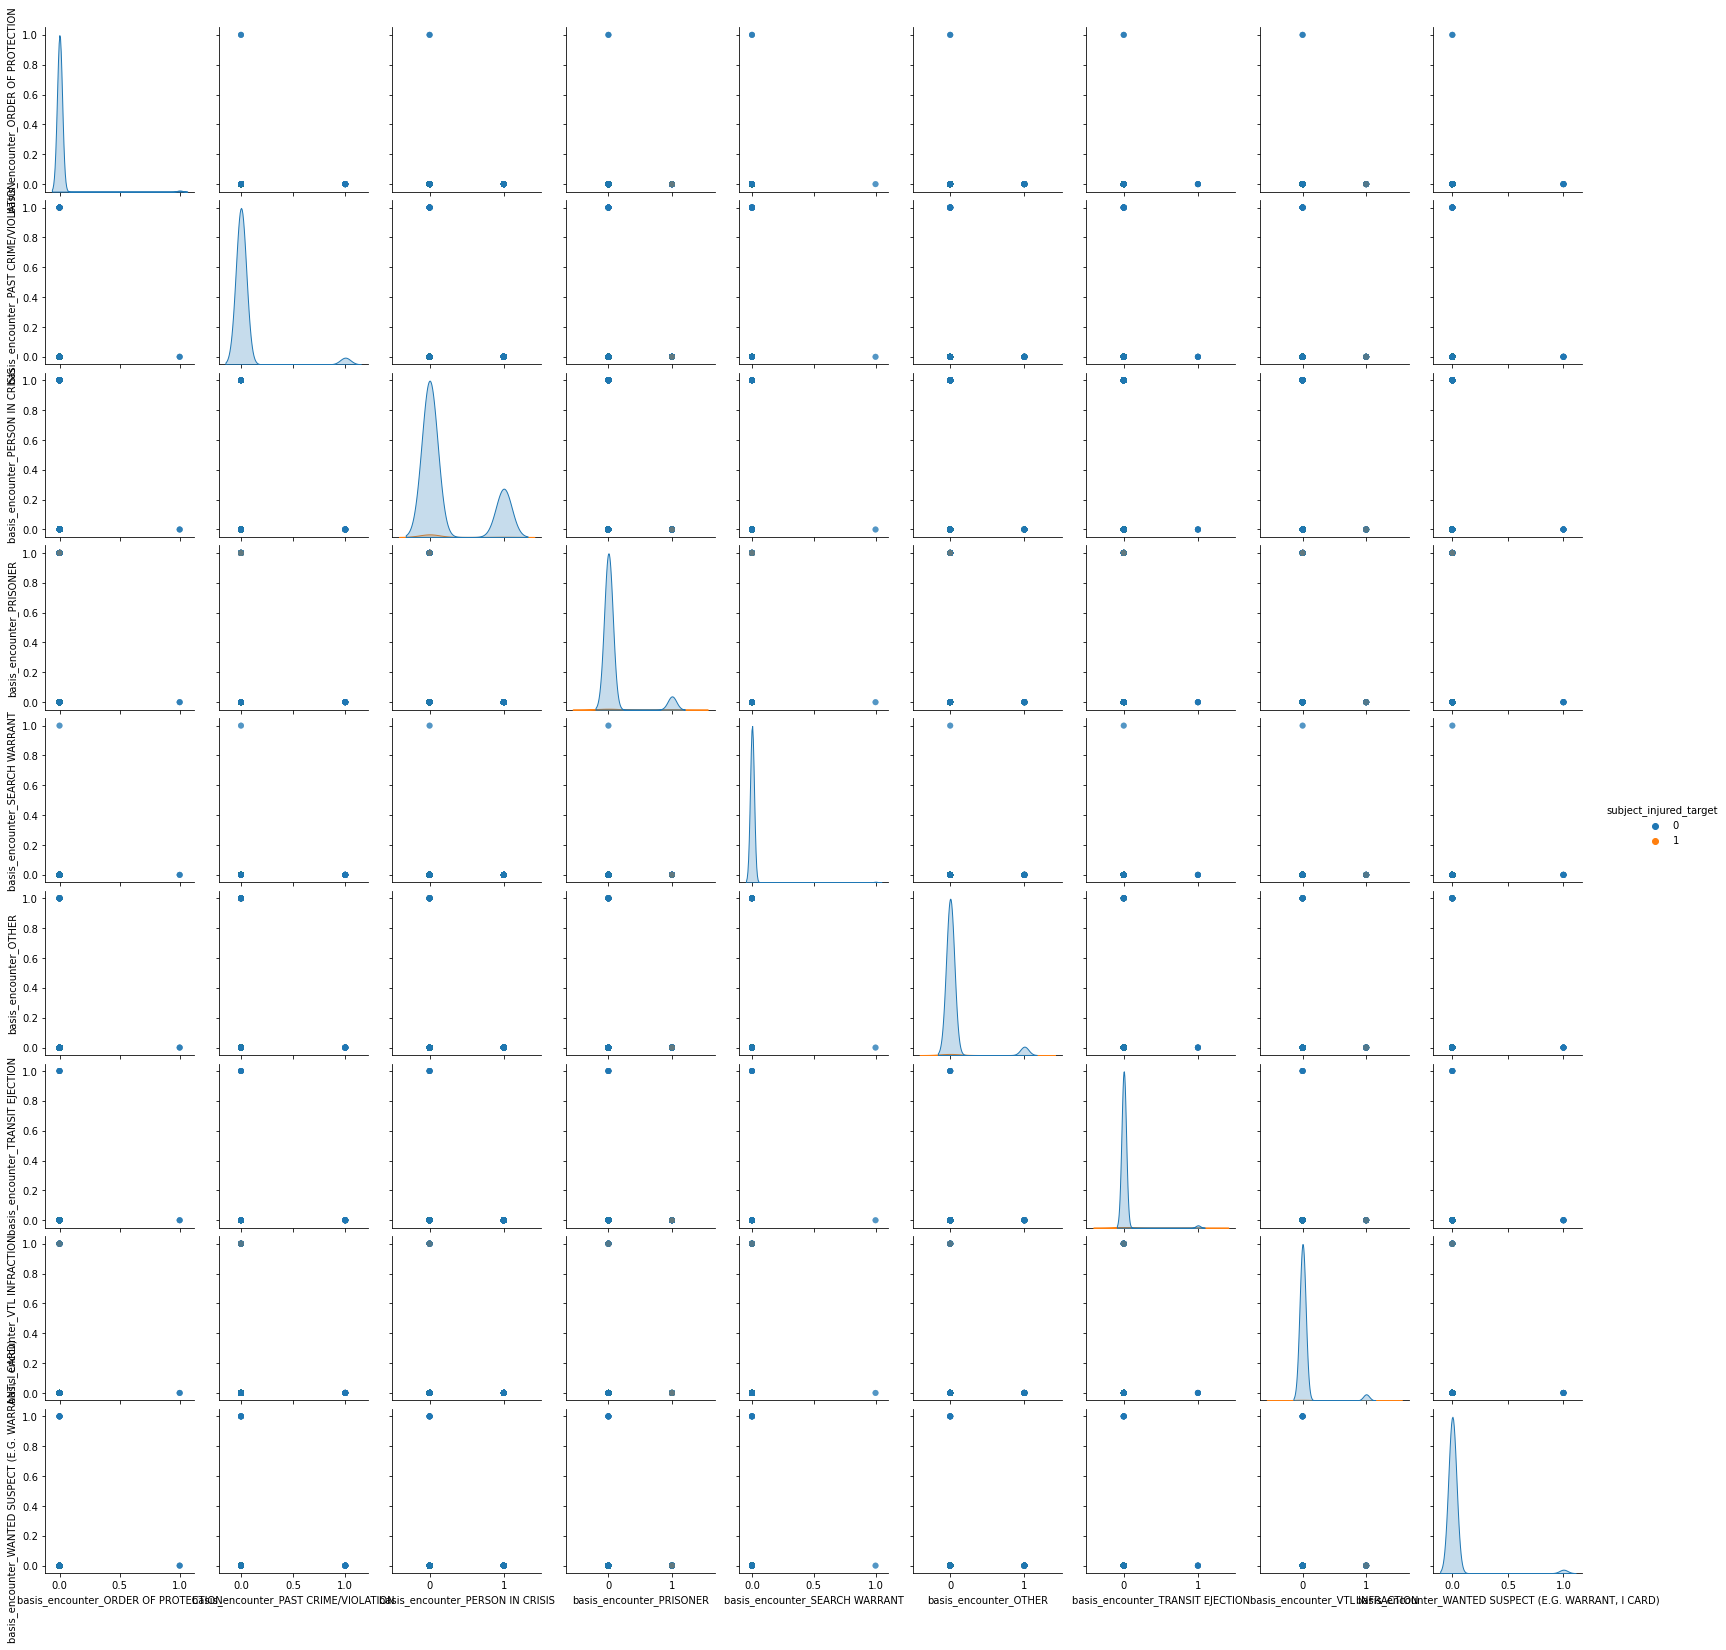

In [128]:
plot_features(subjects_incidents[['subject_injured_target',
       'basis_encounter_ORDER OF PROTECTION',
       'basis_encounter_PAST CRIME/VIOLATION',
       'basis_encounter_PERSON IN CRISIS', 'basis_encounter_PRISONER',
       'basis_encounter_SEARCH WARRANT', 'basis_encounter_OTHER',
       'basis_encounter_TRANSIT EJECTION', 'basis_encounter_VTL INFRACTION',
       'basis_encounter_WANTED SUSPECT (E.G. WARRANT, I CARD)']])

Target variable versus the patrol borough where the incident occurred

In [129]:
subjects_incidents.patrol_borough.value_counts()

PBBX    3298
PBBN    2090
PBBS    1775
PBMS    1649
PBMN    1553
PBQS    1367
PBQN     958
PBSI     540
Name: patrol_borough, dtype: int64

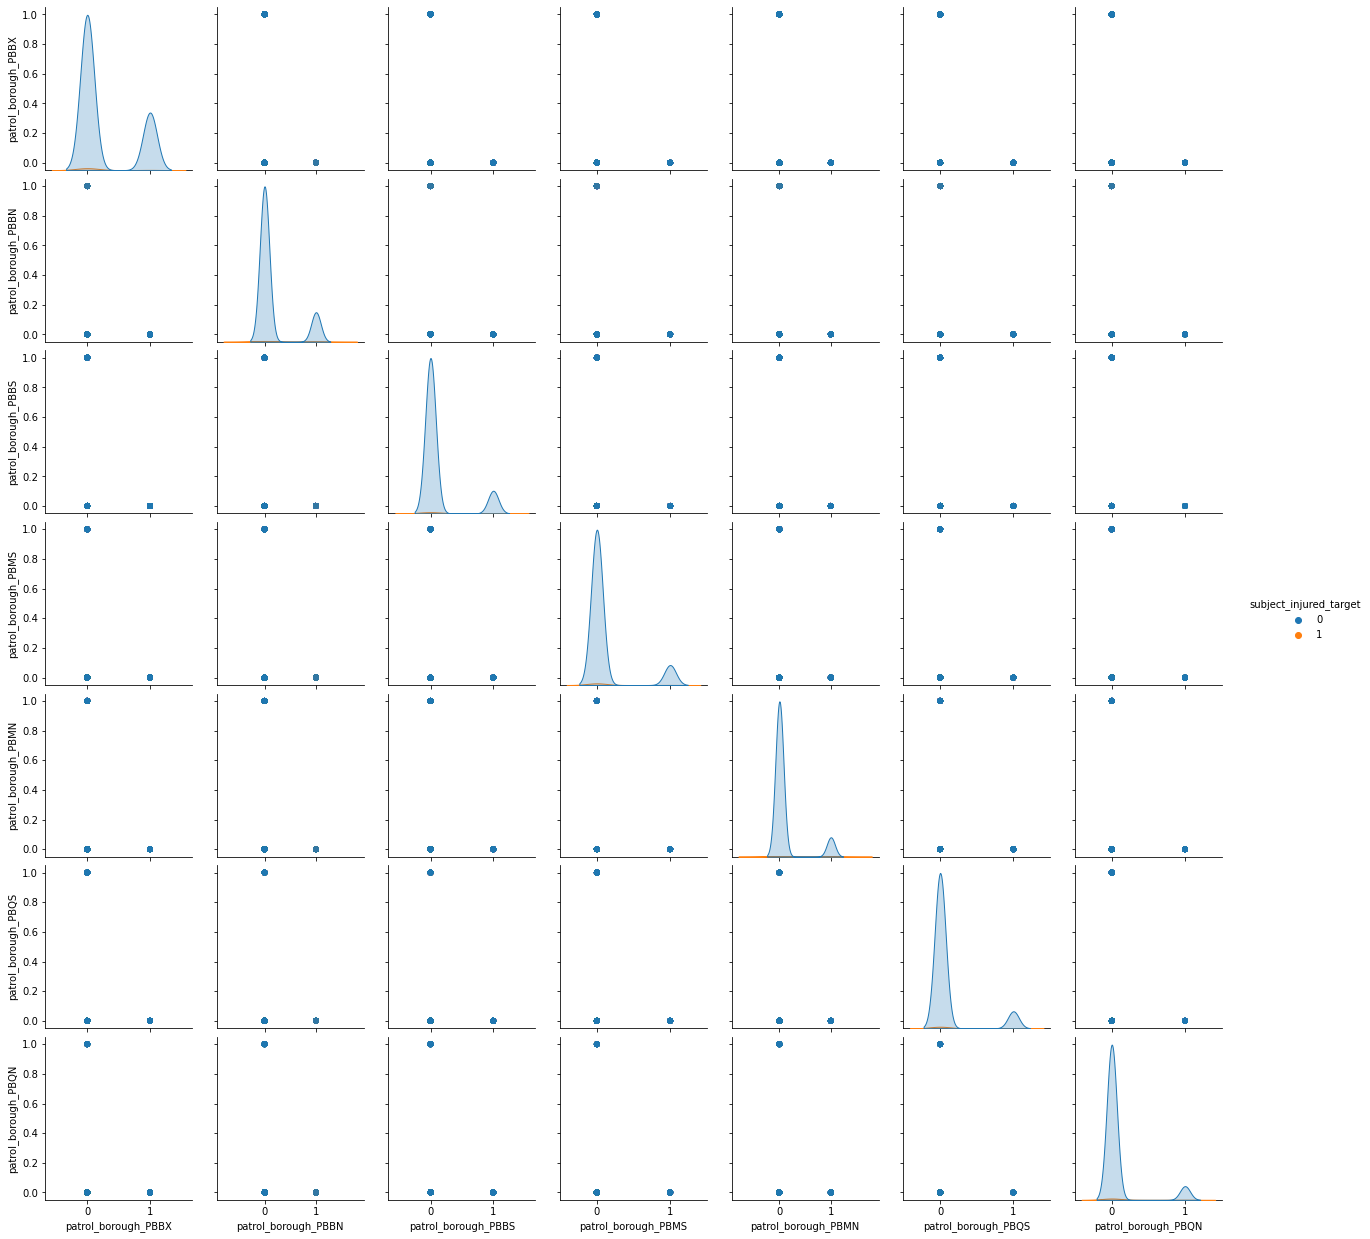

In [130]:
plot_features(subjects_incidents[['subject_injured_target','patrol_borough_PBBX', 'patrol_borough_PBBN', 'patrol_borough_PBBS',
       'patrol_borough_PBMS', 'patrol_borough_PBMN', 'patrol_borough_PBQS',
       'patrol_borough_PBQN']])

Target variable versus the member of service's title

In [133]:
subjects_incidents.columns

Index(['subject_id', 'tri_incident_number', 'subject_injury_level',
       'subject_injured', 'subject_age', 'subject_race', 'subject_gender',
       'force_against_mos', 'subject_used_force', 'occurrence_date',
       'incident_pct', 'patrol_borough', 'yearmonthshort', 'basisforencounter',
       'num_subjects', 'num_members', 'subject_mos_race_diff_all',
       'subject_mos_race_diff_any', 'mos_injured_any', 'mos_injured_all',
       'mos_id', 'forcetype', 'member_injurylevel', 'member_injured',
       'rank_grouped', 'assignment', 'member_gender', 'member_race',
       'race_diff', 'forcetype_Electrical Weapon', 'forcetype_Firearm',
       'forcetype_Impact Weapon', 'forcetype_OC Spray',
       'forcetype_Police Canine', 'forcetype_Restraining Mesh Blanket',
       'basis_encounter_AMBUSH OF MEMBER', 'basis_encounter_ANIMAL CONDITION',
       'basis_encounter_CRIME/VIOLATION IN PROGRESS',
       'basis_encounter_CROWD CONTROL',
       'basis_encounter_DETECTIVE INVESTIGATION', 'basi

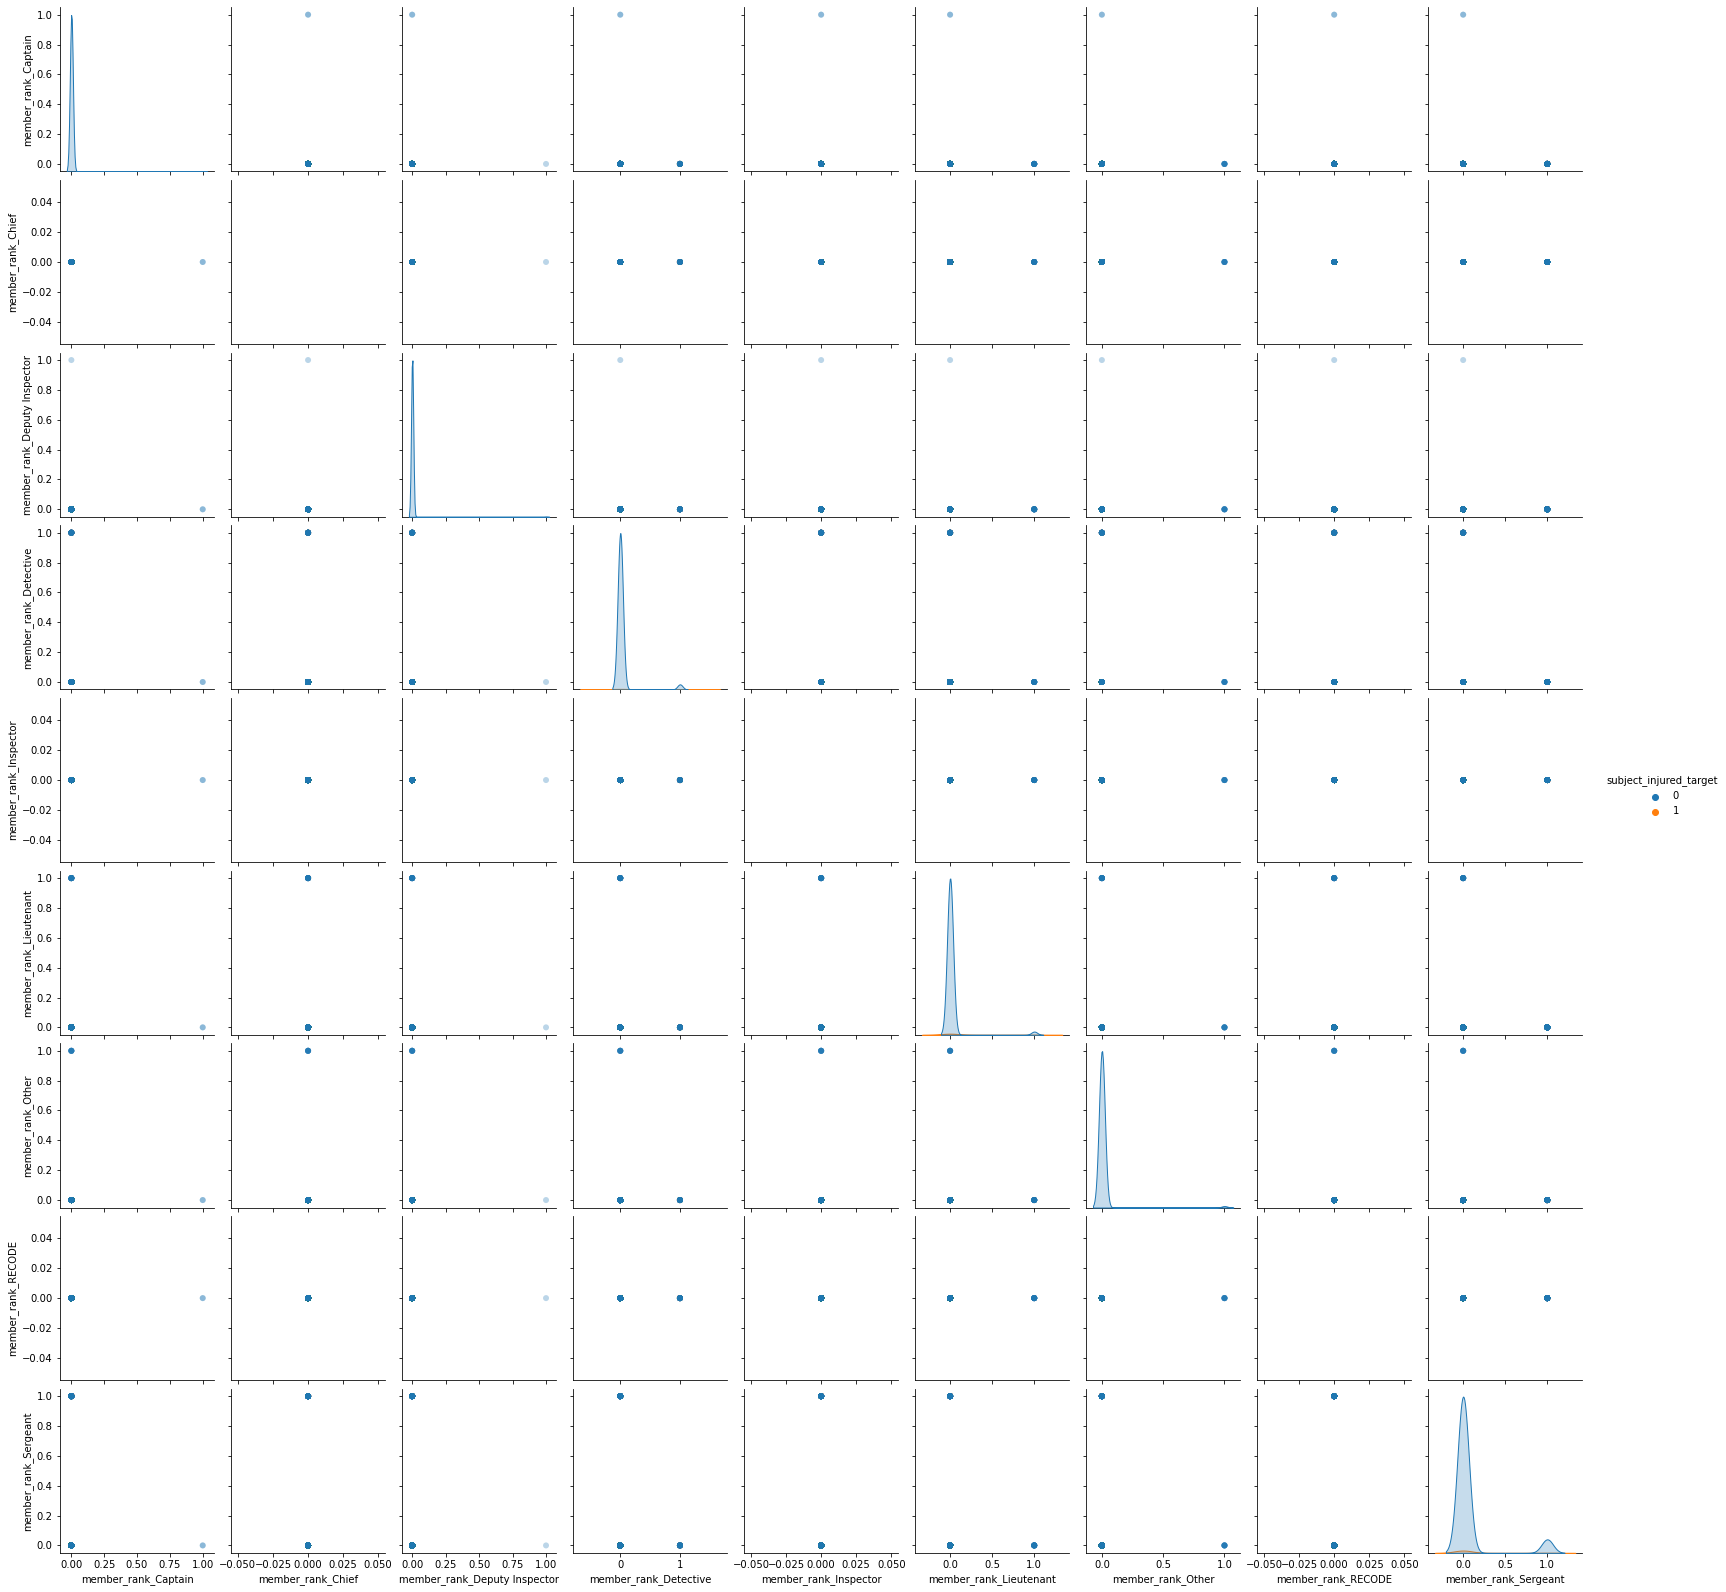

In [134]:
plot_features(subjects_incidents[['subject_injured_target','member_rank_Captain',
       'member_rank_Chief', 'member_rank_Deputy Inspector',
       'member_rank_Detective', 'member_rank_Inspector',
       'member_rank_Lieutenant', 'member_rank_Other', 'member_rank_RECODE',
       'member_rank_Sergeant']])

Target variable versus the member of service's assignment

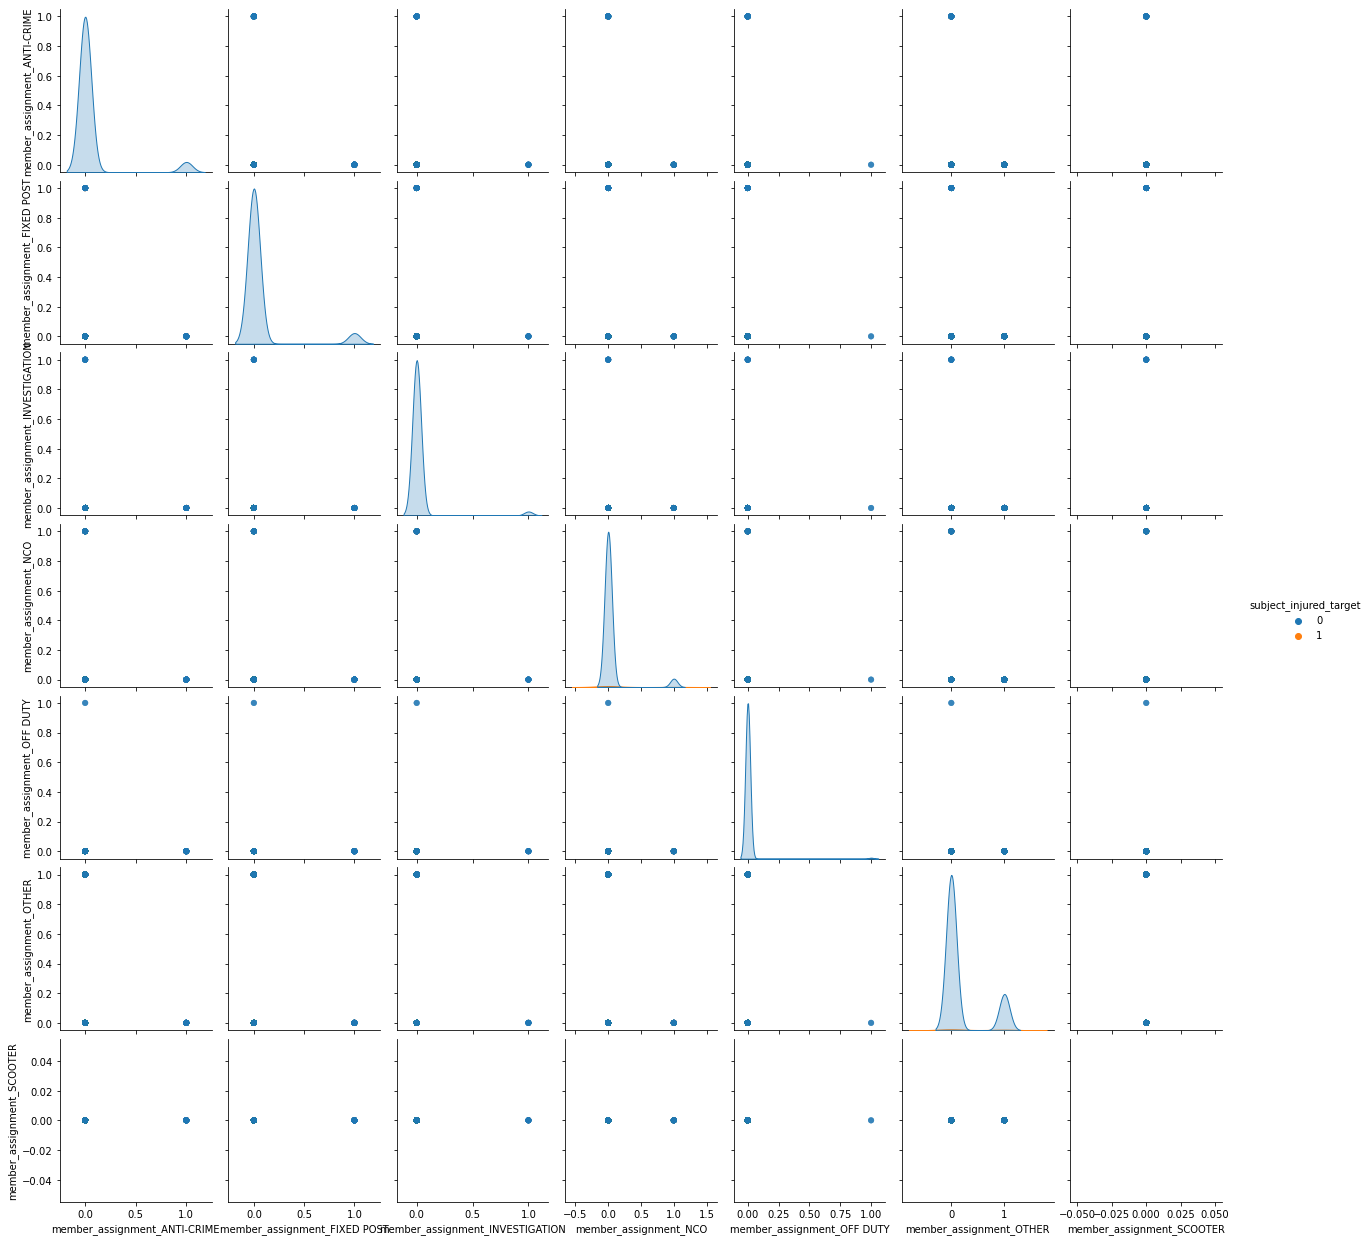

In [135]:
plot_features(subjects_incidents[['subject_injured_target','member_assignment_ANTI-CRIME',
       'member_assignment_FIXED POST', 'member_assignment_INVESTIGATION',
       'member_assignment_NCO', 'member_assignment_OFF DUTY',
       'member_assignment_OTHER', 'member_assignment_SCOOTER']])

Target variable versus the member of service's gender

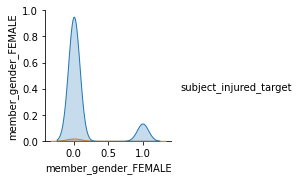

In [136]:
plot_features(subjects_incidents[['subject_injured_target','member_gender_FEMALE']])

Target variable versus the member of service's race

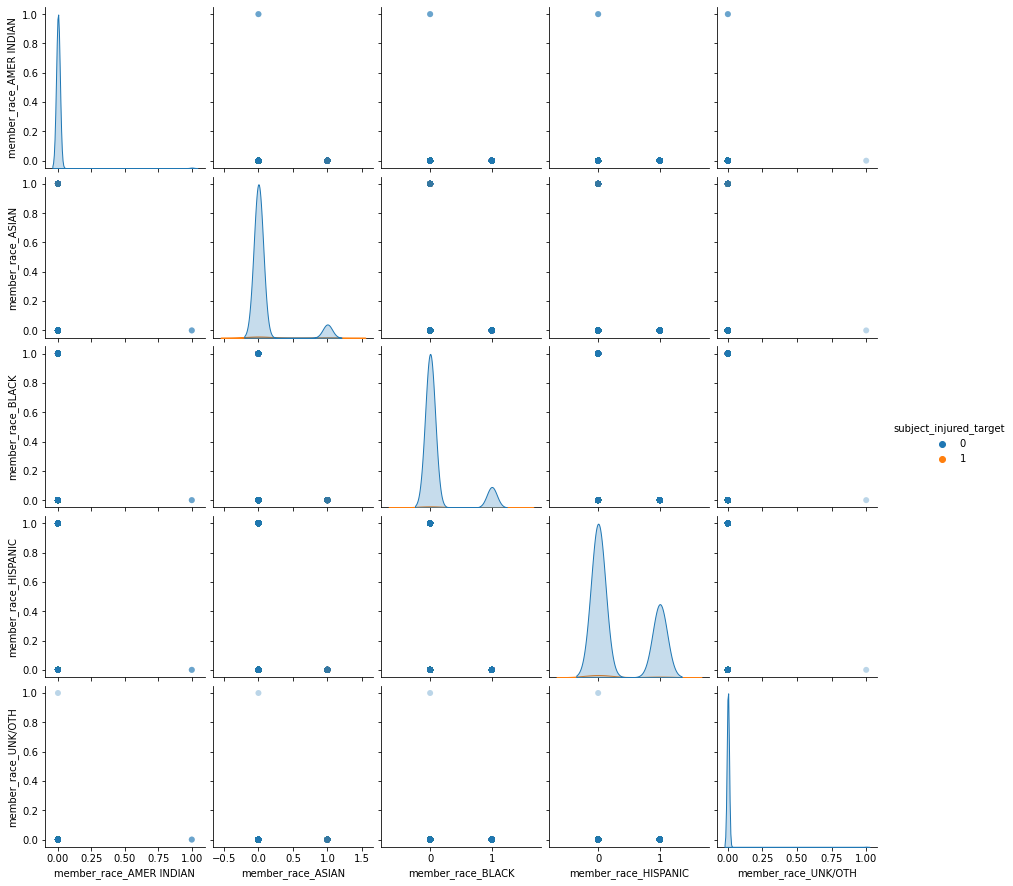

In [137]:
plot_features(subjects_incidents[['subject_injured_target','member_race_AMER INDIAN',
       'member_race_ASIAN', 'member_race_BLACK', 'member_race_HISPANIC',
       'member_race_UNK/OTH']])

Target variable versus whether races of subject and member of service are diff

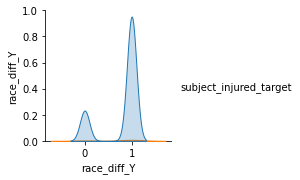

In [117]:
plot_features(subjects_incidents[['subject_injured_target','race_diff_Y']])

Target variable versus whether member was injured

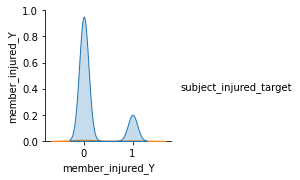

In [124]:
plot_features(subjects_incidents[['subject_injured_target','member_injured_Y']])

All of these pair plots appear to suggest that none of the features have strong predictive power on their own, so we'll see how the first model turns out with all of them included!